In [99]:
import numpy as np
import math
import matplotlib.pyplot as plt

 5


The new point has been classified as: 1


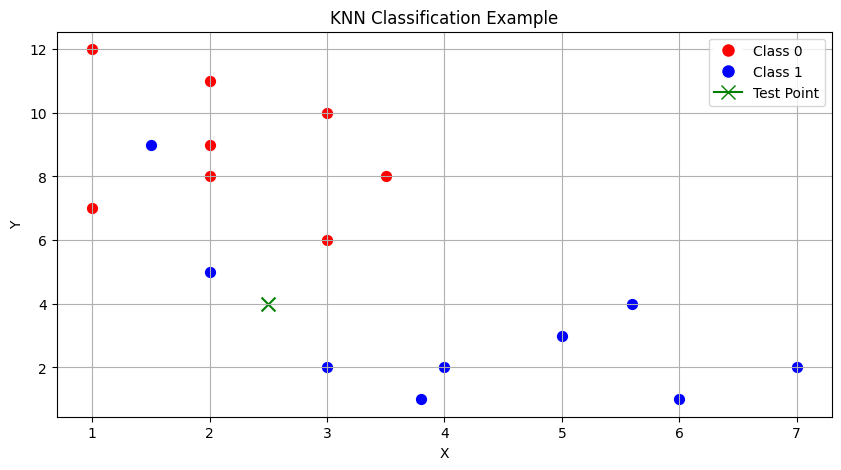

In [103]:
class KNN:
    def __init__(self,k,data):
        self.k=k
        self.data=data
    def distance(self,p1,p2):
        dist=math.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)
        return dist
    def calculate(self,p):
        dist_array=[]
        for i in self.data:
            for j in self.data[i]:
                dist_value=self.distance(j,p)
                dist_array.append((dist_value,i))
        dist_array= sorted(dist_array)[:self.k]
        zero_freq=0
        one_freq=0
        for i in dist_array:
            if i[1]==0:
                zero_freq+=1
            elif i[1]==1:
                one_freq+=1
        if one_freq>zero_freq:
            return 1
        elif one_freq<zero_freq:
            return 0
        elif one_freq==zero_freq:
            return -1
    def plot(self,p):
        plt.figure(figsize=(10,5))
        for i in self.data:
            colour='r' if i==0 else 'b'
            for j in self.data[i]:
                plt.scatter(j[0],j[1],color=colour,s=50)
        plt.scatter(p[0], p[1], color='g', marker='x', s=100, label='Test Point')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('KNN Classification Example')


        # Adding custom legend entries
        legend_entries = [
            plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='r', markersize=10, label='Class 0'),
            plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='b', markersize=10, label='Class 1')
        ]
        
        plt.legend(handles=legend_entries + [plt.Line2D([0], [0], marker='x', color='g', markersize=10, label='Test Point')],
                   loc='best')
        plt.grid(True)
        plt.show()
    

def main():
        data={
            0:[(1,12),(2,8),(3,6),(3,10),(3.5,8),(2,11),(2,9),(1,7)],
            1:[(5,3),(3,2),(1.5,9),(7,2),(6,1),(3.8,1),(5.6,4),(4,2),(2,5)]
        }
        k=int(input())
        if k>(len(data[0]) + len(data[1])):
            return -1
        object=KNN(k,data)     #Initializing using a constructor
        p = [2.5,4]
        result= object.calculate(p)
        print(f"The new point has been classified as: {result}")
        object.plot(p)
main()